In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SET THE COLOR THEME FOR SEABORN
sns.set_theme(color_codes=True)

# PANDAS DATA FRAME TO DISPLAY ALL COLUMNS
pd.set_option('display.max_columns',None)
# PANDAS DATA FRAME WITH 2 DECMIMAL PLACES
pd.set_option('display.float_format', lambda x: '%.2f' % x)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_predict

In [63]:
# READ THE CSV FILE INTO DATAFRAME
df = pd.read_csv('advertising.csv', encoding='unicode_escape')
## TV, Radio, Newspaper are Indepdendent Variables
## sales -- Dependent Variables

In [64]:
# DISPLAY THE TOP FIVE ROWS OF THE DATAFRAME
df.head()

,TV,radio,newspaper,sales
1,230.10,37.80,69.20,22.10
2,44.50,39.30,45.10,10.40
3,17.20,45.90,69.30,9.30
4,151.50,41.30,58.50,18.50
5,180.80,10.80,58.40,12.90


In [65]:
# DISPLAY THE LAST FIVE ROWS OF THE DATAFRAME
df.tail()

,TV,radio,newspaper,sales
196,38.20,3.70,13.80,7.60
197,94.20,4.90,8.10,9.70
198,177.00,9.30,6.40,12.80
199,283.60,42.00,66.20,25.50
200,232.10,8.60,8.70,13.40


In [66]:
## SHAPE OF THE DATAFRAME
df.shape

(200, 4)

In [67]:
## DESCRIBE OF THE DATAFRAME
df.describe()

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [68]:
X = df[['TV']]
y = df[['sales']]

In [69]:
reg_model = LinearRegression().fit(X,y)

In [70]:
constant = reg_model.intercept_[0] ## intercept is referred as constant

In [71]:
w = reg_model.coef_[0][0] # value of w

In [72]:
## Predictions for TV = 150 the sales will be
estimate1 = constant + w * 150
## Predictions for TV = 500 the sales will be
estimate2 = constant + w * 500

In [73]:
estimate1

14.163089614080658

In [74]:
estimate2

30.800913765637574

PLOT USING MATPLOTLIB AND SEABORN

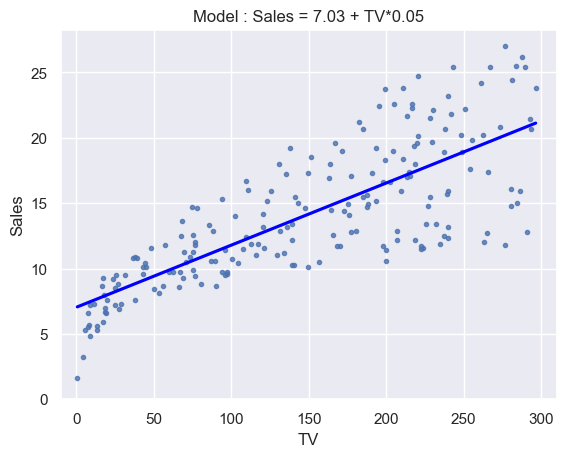

In [75]:
# ci --> confident information level is False
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's':9}, ci=False, color='blue')

# constant of the regression model is taken (constant) + 0th cofficent from the regression model (w)
g.set_title(f"Model : Sales = {round(constant,2)} + TV*{round(w,2)}")

g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

MSE - MEAN SQUARE ERROR

In [76]:
## CALCULATE THE MEAN SQUARE ERROR
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

In [77]:
y.mean() ## MEAN VALUE OF y

sales   14.02
dtype: float64

In [78]:
y.std() ## STANDARD DEVIATION OF Y

sales   5.22
dtype: float64

RMSE - ROOT MEAN SQUARE ERROR

In [79]:
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

MAE - MEAN ABSOLUTE ERROR

In [81]:
mean_absolute_error(y, y_pred)

2.549806038927486

ASSES - R-KARE (RSQUARE VALUE)

In [82]:
reg_model.score(X,y)

0.611875050850071